In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
import os

folder_path = '../data/'

csv_files = np.array([f for f in os.listdir(folder_path) if f.endswith('.csv')])
csv_files = np.sort(csv_files)[:-1]
print(csv_files)

['2301.csv' '2302.csv' '2303.csv' '2304.csv' '2305.csv' '2306.csv'
 '2307.csv' '2308.csv' '2309.csv' '2310.csv' '2311.csv' '2312.csv'
 '2313.csv' '2314.csv' '2315.csv' '2316.csv' '2317.csv' '2318.csv'
 '2319.csv' '2320.csv' '2321.csv' '2322.csv']


In [135]:
df_collar = pd.read_csv("../data/locations.csv")

In [136]:
folder_path+csv_files[kk]

'../data/2308.csv'

In [198]:
kk = 6
def foo(kk=0, ii=4):
    df = pd.read_csv(folder_path+csv_files[kk])
    df_group = df.groupby('f (Hz)')
    base_freqs  = list(df_group.groups.keys())
    
    base_freq = base_freqs[ii]
    df_tmp = df_group.get_group(base_freq)
    voltage = df_tmp['V (mV/Am2)'].values
    noise = df_tmp['N (mV/Am2)'].values
    times = df_tmp['Time (s)'].values
    plt.errorbar(times, voltage, yerr=noise, marker='.', linestyle='None', color='k')
    plt.errorbar(times, -voltage, yerr=noise, marker='.', linestyle='None', color='b')
    plt.xscale('log')
    plt.yscale('log')
    # plt.loglog(times, noise, '.')
    plt.ylim(1e-8, 1)
    plt.xlim(1e-6, 1e-2)
    plt.title(csv_files[kk])

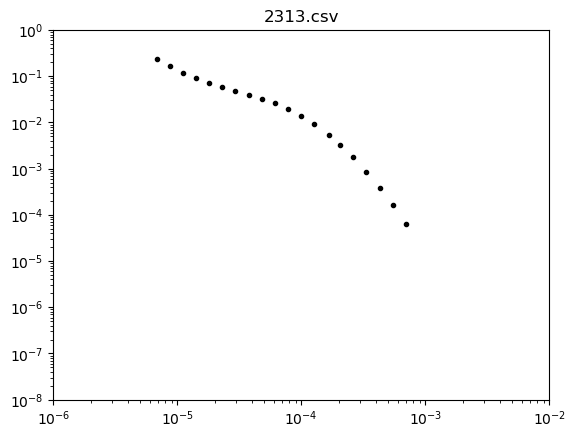

In [199]:
foo(12)

## Notes
- 2301, 2305, 2306, 2307, 2308, 2309
- 2312, 2313

Text(0.5, 1.0, '2311.csv')

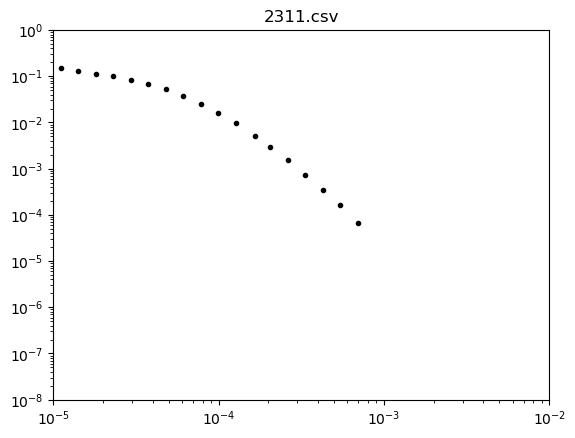

In [205]:
kk = 10
ii = 4
df = pd.read_csv(folder_path+csv_files[kk])
df_group = df.groupby('f (Hz)')
base_freqs  = list(df_group.groups.keys())

base_freq = base_freqs[ii]
df_tmp = df_group.get_group(base_freq)
voltage = df_tmp['V (mV/Am2)'].values
noise = df_tmp['N (mV/Am2)'].values
times = df_tmp['Time (s)'].values
plt.errorbar(times, voltage, yerr=noise, marker='.', linestyle='None', color='k')
plt.errorbar(times, -voltage, yerr=noise, marker='.', linestyle='None', color='b')
plt.xscale('log')
plt.yscale('log')
# plt.loglog(times, noise, '.')
plt.ylim(1e-8, 1)
plt.xlim(1e-5, 1e-2)
plt.title(csv_files[kk])

In [206]:
base_freqs

[3.0, 7.5, 30.0, 75.0, 285.0]

In [207]:
1./ (8e-3)

125.0

In [208]:
from ipywidgets import interact, widgets

In [209]:
interact(
    foo, 
    kk=widgets.IntSlider(min=0, max=len(csv_files)-1),
    ii=widgets.IntSlider(min=0, max=4, value=3)
)

interactive(children=(IntSlider(value=0, description='kk', max=21), IntSlider(value=3, description='ii', max=4…

<function __main__.foo(kk=0, ii=4)>

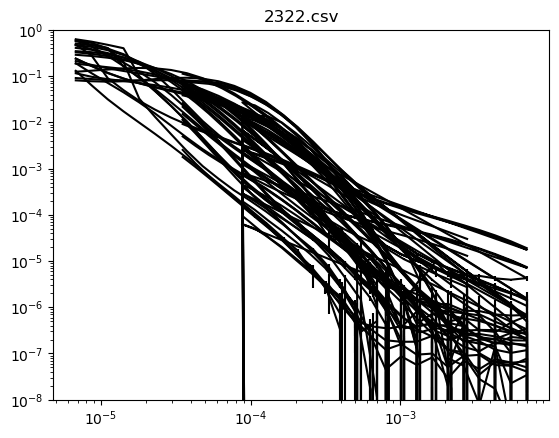

In [176]:
kk = 6
for kk in range(len(csv_files)):
    for ii in [2, 3, 4]:
        df = pd.read_csv(folder_path+csv_files[kk])
        df_group = df.groupby('f (Hz)')
        base_freqs  = list(df_group.groups.keys())
        
        base_freq = base_freqs[ii]
        df_tmp = df_group.get_group(base_freq)
        voltage = df_tmp['V (mV/Am2)'].values
        noise = df_tmp['N (mV/Am2)'].values
        times = df_tmp['Time (s)'].values
        plt.errorbar(times, voltage, yerr=noise, marker='None', linestyle='-', color='k')
        # plt.errorbar(times, -voltage, yerr=noise, marker='.', linestyle='None', color='b')
        plt.xscale('log')
        plt.yscale('log')
        # plt.loglog(times, noise, '.')
        plt.ylim(1e-8, 1)
        plt.title(csv_files[kk])

In [5]:
df_collar

,Site,Easting (m),Northing (m),Ice Thickness (m),Water Depth (m),"Water Conductivity (mS/m, Ωm)"
0,1,538490,6978028,1.7,9.4,"8, 125"
1,2,537138,6978249,1.8,12.8,"8, 125"
2,3,536815,6978011,1.5,1.9,"34, 29"
3,4,536714,6977846,Onshore,NaN,NaN
4,5,536891,6977419,BFI,BFI,-
5,6,538865,6976569,BFI,BFI,-
6,7,538392,6975961,BFI,BFI,-
7,8,539120,6975419,1.6,1.8,"35, 29"
8,9,539827,6974558,BFI,BFI,-
9,10,542768,6971136,BFI,BFI,-
